In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

In [2]:
print(tf.__version__)

2.7.0


In [3]:
# Load the data
data = load_breast_cancer()
# Check the type of 'data'
type(data)

sklearn.utils.Bunch

In [4]:
# Bunch object acts like a dict where we can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# the attribute 'data' means the input data
data.data.shape # 569 samples, 30 features

(569, 30)

In [6]:
data.target
# When you have K targets, they are labeled 0 -> K - 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names # Not lost

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.target.shape

(569,)

In [9]:
# Meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into train & test sets
# This lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [11]:
(N, D)

(381, 30)

In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform    (X_test)

In [13]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(  optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluate the model - evaluate() returns loss and accuracy
print(f'Train score: {model.evaluate(X_train, y_train)}')
print(f'Test  score: {model.evaluate(X_test, y_test)}')

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 1.1387 - accuracy: 0.3123 - val_loss: 1.0728 - val_accuracy: 0.3404
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0396 - accuracy: 0.3701 - val_loss: 0.9735 - val_accuracy: 0.4096
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9498 - accuracy: 0.4278 - val_loss: 0.8849 - val_accuracy: 0.4840
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8693 - accuracy: 0.4751 - val_loss: 0.8083 - val_accuracy: 0.5479
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7987 - accuracy: 0.5564 - val_loss: 0.7421 - val_accuracy: 0.6011
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7368 - accuracy: 0.6142 - val_loss: 0.6845 - val_accuracy: 0.6330
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.6404 - val_loss: 0.6346 - val_accuracy: 0.6543
Epoch 8/100


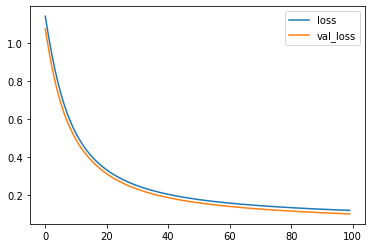

In [14]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],     label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

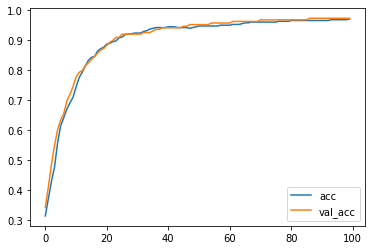

In [15]:
plt.plot(r.history['accuracy'],     label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend() 

# MAKING PREDICTIONS

In [16]:
P = model.predict(X_test)
P # Outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

array([[7.5370699e-02],
       [9.8504698e-01],
       [9.7289419e-01],
       [9.4251102e-01],
       [1.7584705e-01],
       [8.2296908e-01],
       [9.9901867e-01],
       [1.7551661e-02],
       [1.4615953e-03],
       [9.7790593e-01],
       [9.5537996e-01],
       [9.8421228e-01],
       [2.2618741e-02],
       [4.9629807e-04],
       [9.7881001e-01],
       [1.8888712e-04],
       [9.6667767e-01],
       [7.0419431e-01],
       [3.6320686e-03],
       [9.9169326e-01],
       [9.9301642e-01],
       [3.1651258e-03],
       [9.7620809e-01],
       [2.5495887e-04],
       [8.8658786e-01],
       [9.0421867e-01],
       [9.7895664e-01],
       [9.7867030e-01],
       [8.4397143e-01],
       [9.8729920e-01],
       [9.1693211e-01],
       [2.7322471e-03],
       [5.6423515e-01],
       [2.7553065e-06],
       [7.8077132e-01],
       [9.9506545e-01],
       [9.9527776e-01],
       [9.7772217e-01],
       [1.4382601e-04],
       [7.1989596e-03],
       [9.9835914e-01],
       [9.394739

In [17]:
# Round to get the actual predictions
# Has to be flattened since the targets are size (N,) while the predictions are size (N, 1)
import numpy as np
P = np.round(P).flatten()
P

array([0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1.], dtype=float32)

In [20]:
# Calculate the accuracy, compare it to evaluate() output
print(f'Manually calculated accuracy: {np.mean(P == y_test)}')
print(f'Evaluate output:              {model.evaluate(X_test, y_test)}')

Manually calculated accuracy: 0.973404255319149
6/6 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9734
Evaluate output:              [0.10180175304412842, 0.9734042286872864]


# SAVE & LOADING A MODEL

In [21]:
model.save('linear_classifier.h5')

In [24]:
ls

 Volume in drive C is Acer
 Volume Serial Number is DE24-AAA8

 Directory of c:\Users\Doan Trong Hieu\Downloads\IMPORTANT\SPECIALIZATION\Artificial_Intelligence\COMPUTER VISION\CODING_COMPUTER_VISION\UDM_Lazy_Programmer_Inc_CNN

03/15/2022  08:18 AM    <DIR>          .
03/14/2022  07:45 PM    <DIR>          ..
03/15/2022  08:18 AM            19,312 linear_classifier.h5
03/15/2022  01:41 AM             2,302 moore.csv
03/15/2022  08:16 AM            85,207 TF2.Linear_Regression.ipynb
03/15/2022  08:18 AM            66,536 TF2_Linear_Classification.ipynb
               4 File(s)        173,357 bytes
               2 Dir(s)  106,301,771,776 bytes free


In [26]:
# Load the model
model = tf.keras.models.load_model('linear_classifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9734


[0.10180175304412842, 0.9734042286872864]